In [65]:
from docutils.nodes import label
from matplotlib import pyplot as plt
from pandas import DataFrame, read_table
from QuadraticAprox.LDE import Approx
from numpy import linspace, exp, sqrt, pi, dot
from math import erf, isclose

In [66]:
points = linspace(0, 1, 10)
N = 6

In [67]:
approx = Approx(points, N, p=lambda x:x, g=lambda x:1, f=lambda x:2*x)

In [68]:
approx.coefficients()

array([-0.72712777, -1.22706929,  0.29032974,  0.35027185, -0.12194872,
       -0.00448638])

In [69]:
plotPoints = linspace(-3, 3, 100)

(-1.0, 2.0)

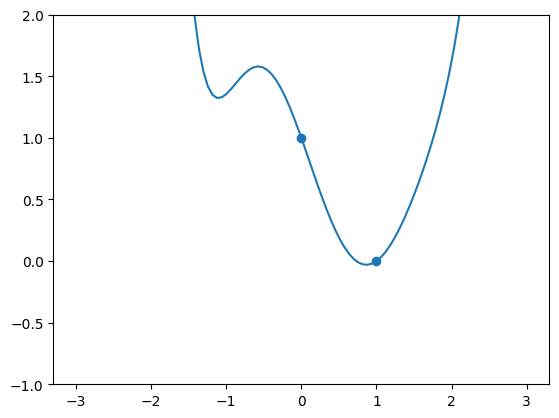

In [70]:
plt.plot(plotPoints, [ approx(x) for x in plotPoints ])
plt.scatter([0, 1], [1, 0])
plt.ylim([-1,2])

In [71]:
C1 = -3.1
C2 = 1
def real(x):
    _v = exp(-1 * x * x / 2)
    return C1 * sqrt(pi / 2) * _v * erf(x / 1.4142) + C2 * _v + x

In [72]:
X = linspace(-2, 2, 50)
realValues = [real(x) for x in X]

In [73]:
appValues = [ approx(x) for x in X ]

In [74]:
nX = points

curDf = DataFrame(columns=["x", "diff y", "w"])
curDf["x"] = points
curDf["w"] = 1


In [75]:
curDf

,x,diff y,w
0,0.000000,NaN,1
1,0.111111,NaN,1
2,0.222222,NaN,1
3,0.333333,NaN,1
4,0.444444,NaN,1
5,0.555556,NaN,1
6,0.666667,NaN,1
7,0.777778,NaN,1
8,0.888889,NaN,1
9,1.000000,NaN,1


In [76]:
curDf.at[0, "w"] = 100
curDf.at[len(points)-1, "w"] = 100
curDf

,x,diff y,w
0,0.000000,NaN,100
1,0.111111,NaN,1
2,0.222222,NaN,1
3,0.333333,NaN,1
4,0.444444,NaN,1
5,0.555556,NaN,1
6,0.666667,NaN,1
7,0.777778,NaN,1
8,0.888889,NaN,1
9,1.000000,NaN,100


In [77]:
realPoints = [real(x) for x in points]


In [78]:


resDf = DataFrame(index=range(1, N+1), columns=["err"])
for power in range(1, N+1):
    approx = Approx(points, power, p=lambda x:x, g=lambda x:1, f=lambda x:2*x)
    print(approx.coefficients())
    approxValues = [approx(x) for x in points]
    curDf["diff y"] = [(a - b) ** 2 for a, b in zip(realPoints, approxValues)]

    resDf.loc[power, "err"] = sum(curDf["w"] * curDf["diff y"])


[-0.55981667]
[-0.64488365 -0.81024154]
[-0.72573789 -1.2653209   0.55859146]
[-0.72883598 -1.23910468  0.41399599  0.11047218]
[-0.7271461  -1.22700844  0.28794607  0.35879635 -0.13270592]
[-0.72712777 -1.22706929  0.29032974  0.35027185 -0.12194872 -0.00448638]


In [79]:
resDf

,err
1,0.389168
2,0.122865
3,0.072295
4,0.068891
5,0.068964
6,0.068979


[]

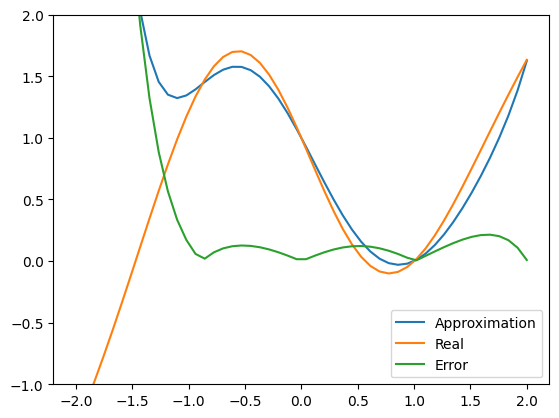

In [80]:
plt.plot(X, appValues, label="Approximation")
plt.plot(X, realValues, label="Real")
plt.plot(X, [abs(a - b) for a, b in zip(appValues, realValues)], label="Error")
plt.ylim([-1, 2])

plt.legend()
plt.plot()